# Определение закономерностей, влияющих на успешность игры

Для анализа предоставлена таблица об играх различных платформ и жанров игр с 1980 по 2016 год. 

Цель проекта: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.

План работы:
- [Подготовка данных](#1step): 
    * замена названий столбцов;
    * преобразование данных в нужные типы; 
    * обработка пропусков; 
    * добавление столбца с информацией по суммарным продажам.
- [Исследовательский анализ данных](#2step): 
    * определение выпуска игр по годам; 
    * изменения продаж по платформам;
    * распределение продаж по годам;
    * поиск популярных в прошлом платфом, определение жизненного цикла платформы;
    * определение периода данных для дальнейшего анализа;
    * поиск популярных платформ, потенциально прибыльных платформ;
    * построение графика "ящик с усами"по глобальным продажам каждой игры и платформам;
    * определение влияния на продажи отзывов пользовалетей и критиков, построение диаграммы рассеяния, подсчет корреляции;
    * изучение общего распределения игр по жанрам.
- [Составление портрета пользователя каждого региона](#3step):
    * определение для пользователя каждого региона самых популярных платформ, жанров, влияния рейтинга ESBR на продажи.
- [Исследование статистических показателей](#4step):
    * изменения рейтинга пользователей и критиков в различных жанрах, подсчет среднего количества, дисперсии, стандартного отклонения, построение гистограмм.
- [Проверка гипотез](#4step):
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    * Средние пользовательские рейтинги жанров Action и Sports разные.
- [Общий вывод](#5step).


<a id='1step'></a>

## Подготовка данных

In [1]:
import pandas as pd #импорт библиотек
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
import seaborn as sns
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [2]:
df = pd.read_csv('...') #открытие таблицы
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Замена названий столбцов

In [3]:
#переименование столбцов
df = df.rename(columns = {'Name': 'name','Platform': 'platform','Year_of_Release': 'year_of_release', 'Genre': 'genre', 'NA_sales': 'na_sales','EU_sales': 'eu_sales', 'JP_sales': 'jp_sales', 'Other_sales': 'other_sales', 'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразование данных в нужные типы

In [4]:
df.info() #просмотр информации о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразования требуют следующие данные:
- year_of_release в тип integer, т.к. представляет собой целое число;
- user_score в тип float, т.к. представляет собой чиcло в плавающей точкой.

Для изменения типа year_of_release сначала необходимо удалить пропуски.

### Обработка пропусков 

In [5]:
df.isnull().sum() #поиск пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [6]:
empty_year = df['year_of_release'].isnull().sum() / 16713 #подсчет количества пропущенных значений
empty_year

0.016095255190570215

В столбце year_of_release 1,6% пропущенных значений, их допустимо удалить.

In [7]:
df.dropna(subset=['year_of_release'], inplace=True) #удаление пропущенных значений
df['year_of_release'] = pd.to_numeric(df['year_of_release'],errors ='coerce', downcast = 'integer') #замена типов

In [8]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce') #замена типа в столбце 'user_score', замена всех текстовых значений на NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int16  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int16(1), object(4)
memory usage: 1.4+ MB


In [9]:
df.isnull().sum() #просмотр количества пропусков

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [10]:
df[df['name'].isnull()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [11]:
df = df.drop(index=[659, 14244]).reset_index(drop = True) #удаление пропущенных значений в столбце name
df['name'].isnull().sum()

0

In [12]:
df['rating'] = df['rating'].fillna('Нет рейтинга') #заполнение пропусков в столбце рейтинг на значение "Нет рейтинга"

In [13]:
df.isnull().sum() #проверка пропусков

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Пропуски в year_of_release были удалены, т.к. их заполнение приведет к искажению при анализе данных и пропуски составляли 1% от данных.

Пропуски в name и genre были удалены, т.к. отсутствовали и другие данные по этим строкам.

Пропуски в critic_score, user_score были оставлены без изменений, т.к. их заполение может существенно исказить результаты анализа, при том, что они отсутствуют практически в половине строк. Для столбца рейтинг введна новая категория "Нет рейтинга", т.к. его отсутствие может быть связано не с пропуском, а с отсутствие рейтингования каких-то категорий игр.

Aббревиатура 'tbd' в столбцах с рейтингом обозначает "будет объявлено позже", что можно приравнять к NaN. 
Пропуски значений в данных рейтингов могут быть связаны с особенностями сбора рейтинга, а также временным лагом, особенно за последние годы сбора данных.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [14]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales'] #запись нового столбца
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Нет рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Нет рейтинга,31.38


<a id='2step'></a>

## Исследовательский анализ данных

### Статистика выпуска игр по годам. Выбор временного диапазона для исследования.

In [15]:
game_stat_year = pd.pivot_table(df, index='year_of_release', values='name', aggfunc='count') #сводная таблица с количеством выпущенных игр
game_stat_year 

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


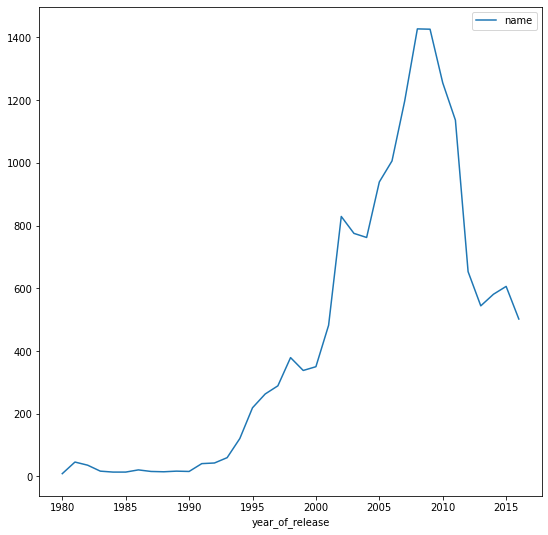

In [16]:
game_stat_year.plot(figsize=(9,9)) #график по годам выхода игр
None

Для анализа будут актуальны данные только начиная с 2012 года, т.к. после пика количества выпущенных игр в 2008-2009 годах, пошел спад и в последние года рынок стабилизировался, кроме того, платформы, на которых выпускались игры в прошлом, уже потеряли свою актуальность.


Спад в индустрии последних лет может быть связан с постоянным усовершенствованием смартфонов, которые успешно заменяют игровые приставки, в так же усложнением процесса создания игр - разработка занимает больше времени, соответственно и игр становится меньше.

In [17]:
df2012 = df.query('year_of_release > 2011') #фильтр таблицы для дальнейшей работы
df2012.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


### Изменение продаж по платформам. Выбор платформ с наибольшими суммарными продажами, построение распределения по годам. 
Поиск популярных в прошлом платформ, у которых сейчас продажи на нуле. Определение характерного периода, за который появляются новые и исчезают старые платформы.

In [18]:
platform_stat= pd.pivot_table(df, index = ['platform'], values = ['total_sales'],aggfunc='sum').sort_values(by = 'total_sales', ascending = False) #сводная таблица по продажам платформ
platform_stat

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


In [19]:
top_platform = platform_stat.head(6).index.tolist() #формирование списка топ-платформ
top_platform

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

Самые большие продажи у платформ PS2, X360, PS3, Wii, DS, PS.
Построим распределение для топ-платформ по годам.

PS2


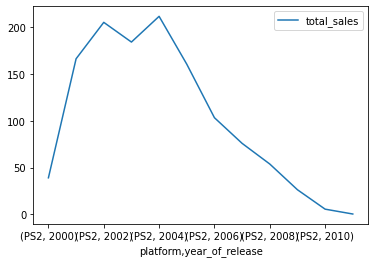

                          total_sales
platform year_of_release             
PS2      2000                   39.17
         2001                  166.43
         2002                  205.38
         2003                  184.31
         2004                  211.81
         2005                  160.66
         2006                  103.42
         2007                   75.99
         2008                   53.90
         2009                   26.40
         2010                    5.64
         2011                    0.45
X360


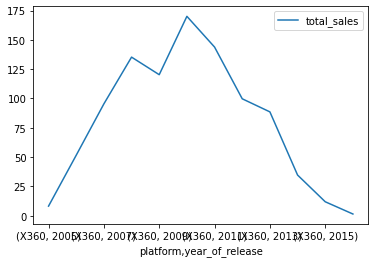

                          total_sales
platform year_of_release             
X360     2005                    8.25
         2006                   51.62
         2007                   95.41
         2008                  135.26
         2009                  120.29
         2010                  170.03
         2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
PS3


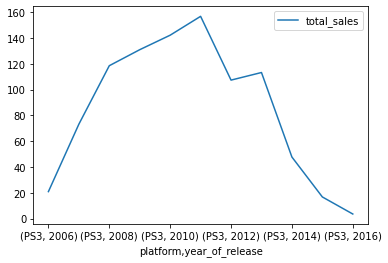

                          total_sales
platform year_of_release             
PS3      2006                   20.96
         2007                   73.19
         2008                  118.52
         2009                  130.93
         2010                  142.17
         2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
Wii


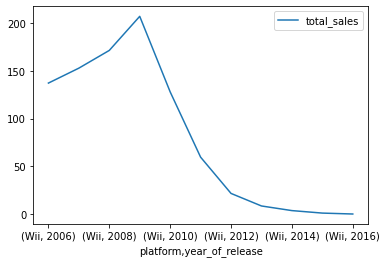

                          total_sales
platform year_of_release             
Wii      2006                  137.15
         2007                  152.77
         2008                  171.32
         2009                  206.97
         2010                  127.95
         2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
DS


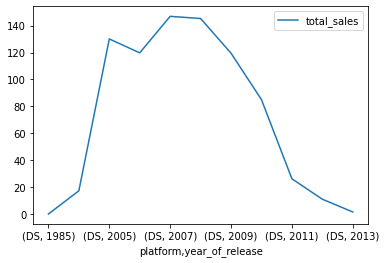

                          total_sales
platform year_of_release             
DS       1985                    0.02
         2004                   17.27
         2005                  130.14
         2006                  119.81
         2007                  146.94
         2008                  145.31
         2009                  119.54
         2010                   85.02
         2011                   26.18
         2012                   11.01
         2013                    1.54
PS


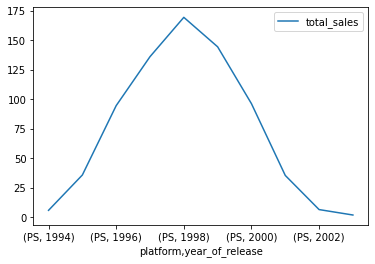

                          total_sales
platform year_of_release             
PS       1994                    6.03
         1995                   35.96
         1996                   94.70
         1997                  136.17
         1998                  169.49
         1999                  144.53
         2000                   96.37
         2001                   35.59
         2002                    6.67
         2003                    2.07


In [20]:
for platform in top_platform: #построение графиков продаж по годам для топ-платформ
    platform_sales = pd.pivot_table(df.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    print(platform)
    platform_sales.plot()
    plt.show()
    print(platform_sales)

Платформы находятся на пике популярности 3-6 лет, затем продажи резко падают. У всех платформ из топ-6 низкие продажи в последние годы анализа. У платформ PS2, DS и PS продажи в последние годы анализа отсутствуют.

In [21]:
df.loc[(df['platform'] == "DS") &(df['year_of_release'] < 2004)] #просмотр записей с ранним выходом на платформе DS

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,Нет рейтинга,0.02


In [22]:
df=df.drop([15957]) #удаление записи

### Определение периода анализа

Предположительно, на 2017 год популярность наберут платформы, которые начали наращивать продажи в 2013-2015 гг. Анализ будет включать это временной промежуток 2011-2016, для того чтобы охватить максимальный подъем продаж одной платформы.

In [23]:
new_df = df.query('year_of_release > 2010') #формирование новой таблицы
new_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,Нет рейтинга,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,Нет рейтинга,14.60
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Нет рейтинга,0.01


### Определение платформ, которые лидируют по продажам, растут или падают. Выбор нескольких потенциально прибыльных платформ.

In [24]:
#создание таблицы с продажами платформ
platform_stat_2010 = pd.pivot_table(new_df, index = ['platform'], values = ['total_sales'],aggfunc='sum').sort_values(by = 'total_sales', ascending = False)
platform_stat_2010

,total_sales
platform,
PS3,445.57
X360,380.38
PS4,314.14
3DS,257.81
XOne,159.32
PC,97.68
Wii,95.02
WiiU,82.19
PSV,53.81


Для анализа будут рассмотрены топ-8 платформ, для включения популярных платформ, находящихся на разных жизненных циклах.

In [25]:
top_8_2010 = platform_stat_2010.head(8).index.tolist() 
top_8_2010

['PS3', 'X360', 'PS4', '3DS', 'XOne', 'PC', 'Wii', 'WiiU']

PS3


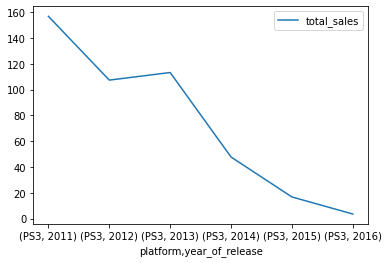

                          total_sales
platform year_of_release             
PS3      2011                  156.78
         2012                  107.36
         2013                  113.25
         2014                   47.76
         2015                   16.82
         2016                    3.60
X360


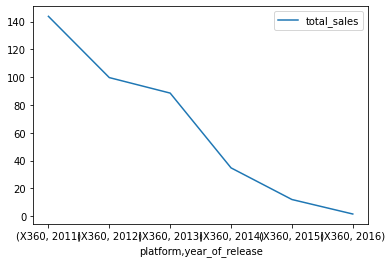

                          total_sales
platform year_of_release             
X360     2011                  143.84
         2012                   99.74
         2013                   88.58
         2014                   34.74
         2015                   11.96
         2016                    1.52
PS4


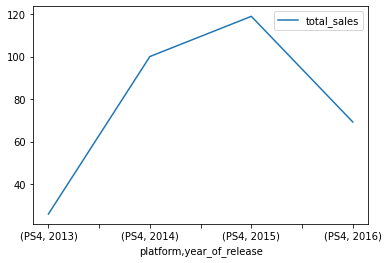

                          total_sales
platform year_of_release             
PS4      2013                   25.99
         2014                  100.00
         2015                  118.90
         2016                   69.25
3DS


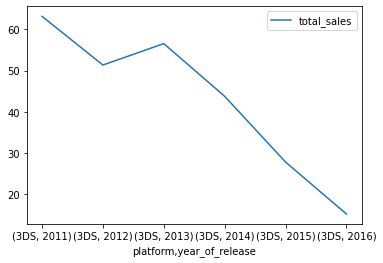

                          total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
         2016                   15.14
XOne


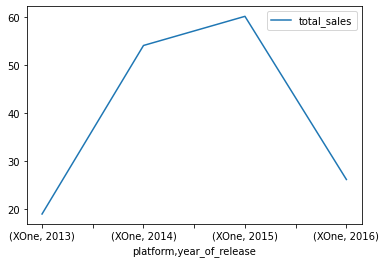

                          total_sales
platform year_of_release             
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15
PC


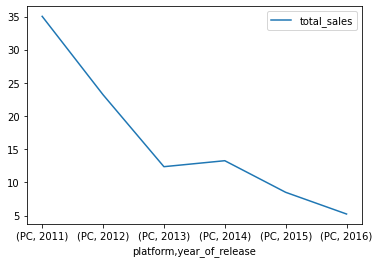

                          total_sales
platform year_of_release             
PC       2011                   35.03
         2012                   23.22
         2013                   12.38
         2014                   13.28
         2015                    8.52
         2016                    5.25
Wii


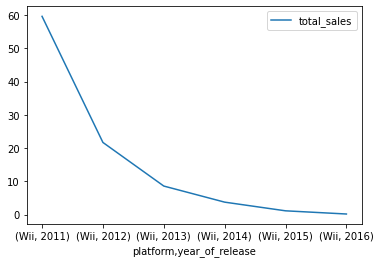

                          total_sales
platform year_of_release             
Wii      2011                   59.65
         2012                   21.71
         2013                    8.59
         2014                    3.75
         2015                    1.14
         2016                    0.18
WiiU


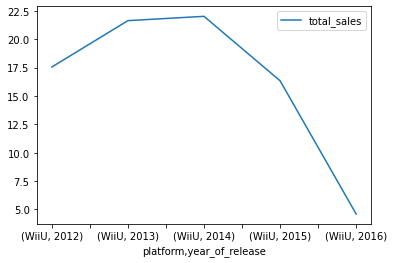

                          total_sales
platform year_of_release             
WiiU     2012                   17.56
         2013                   21.65
         2014                   22.03
         2015                   16.35
         2016                    4.60


In [26]:
for platform in top_8_2010: #построение графиков продаж
    platform_new = pd.pivot_table(new_df.query('platform == @platform'), index=['platform','year_of_release'], values='total_sales', aggfunc='sum')
    print(platform)
    platform_new.plot()
    plt.show()
    print(platform_new)


Из рассмотренных платформ пики продаж уже прошли: PS3, X360, 3DS, Wii, DS, PC.
Популярность на 2017 год будет сохраняться или расти для платформ: PS4, XOne, WiiU.

### Построение графика «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Определение разницы в продажах, в средних продажах на разных платформах.

<AxesSubplot:xlabel='platform', ylabel='total_sales'>

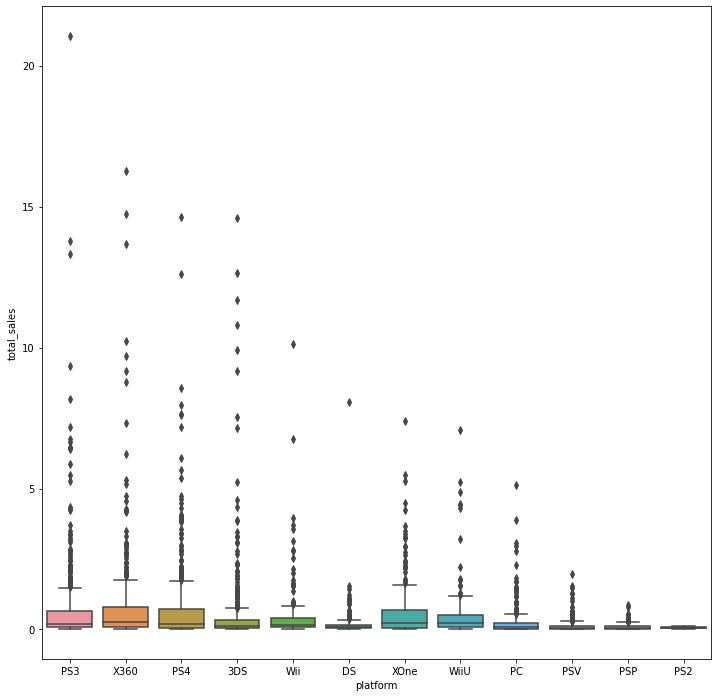

In [27]:
total_sales = new_df['total_sales'] #диаграмы размаха по глобальным продажам для каждой платформы
plt.figure(figsize=(12,12))
sns.boxplot(x = new_df['platform'], y = total_sales)


In [28]:
total_sales.describe() #статистическое описание столбца с продажами

count    4022.000000
mean        0.485855
std         1.219503
min         0.010000
25%         0.040000
50%         0.130000
75%         0.407500
max        21.050000
Name: total_sales, dtype: float64

In [29]:
for platform in top_8_2010: #статситическое описание столбца с продажами для каждой платформы
    platform_new_df = new_df.query('platform == @platform')
    print(platform, '\n', platform_new_df['total_sales'].describe(), '\n')

PS3 
 count    708.000000
mean       0.629336
std        1.451388
min        0.010000
25%        0.070000
50%        0.210000
75%        0.640000
max       21.050000
Name: total_sales, dtype: float64 

X360 
 count    498.000000
mean       0.763815
std        1.637090
min        0.010000
25%        0.090000
50%        0.270000
75%        0.780000
max       16.270000
Name: total_sales, dtype: float64 

PS4 
 count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64 

3DS 
 count    512.000000
mean       0.503535
std        1.441271
min        0.010000
25%        0.050000
50%        0.120000
75%        0.332500
max       14.600000
Name: total_sales, dtype: float64 

XOne 
 count    247.000000
mean       0.645020
std        1.036139
min        0.010000
25%        0.060000
50%        0.220000
75%        0.685000
max        7.390000
Name: total_sales, dtype

Существуют различия в характере продаж по платформам. Самое низкое стандартное отклонение у платформ DS и PC, что говорит о меньшем разбросе данных и приближенности основной массы продаж к средней, соответственно, большинство игр пользуются одинаковым успехом. Также для этих платформ самые низкие значения средних продаж.
Большее количество успешных игр выпущено на платформах PS4, X360 и 3DS. Самые высокие средние продажи - на платформе PS4. При этом максимальные продажи отдельных игр были на платформах PS3 и X360.


Разница продаж между платформами может быть связана со стоимостью разработки игр для каждой платформы, а также жанров, которые пользуются большим успехом среди пользователей платформ. Кроме того, более успешные разработчики могут позволить более дорогие рекламные кампании, стоимость которых будет заложена в цену для пользователей. Также игры для платформ, которые лучше защищены от пиратства, будут продаваться лучше, а чем плафторма современее, тем больше вероятность, что нелегальных игр нет.


В целом можно говорить о том, что было выпущено некоторое количество очень успешных игр на самых популярных платформах: PS3 и Х360, очевидно, что разработчики сделают ставку уже на следующее поколение приставок: PS4 и XOne. 

### Определение характера влияния на продажи внутри одной популярной платформы отзывов пользователей и критиков. Построение диаграммы рассеяния, подсчет корреляции между отзывами и продажами. Соотнесение выводов с продажами игр на других платформах.

In [30]:
PS4_new_df = new_df.query('platform == "PS4"') #таблица с необходимыми значениями на платформе PS4
PS4_score = PS4_new_df.loc[:,['critic_score', 'user_score', 'total_sales']]
PS4_score.head()

,critic_score,user_score,total_sales
31,NaN,NaN,14.63
42,97.0,8.3,12.62
77,82.0,4.3,8.58
87,NaN,NaN,7.98
92,83.0,5.7,7.66


In [31]:
PS4_score.corr() #корреляция 

,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


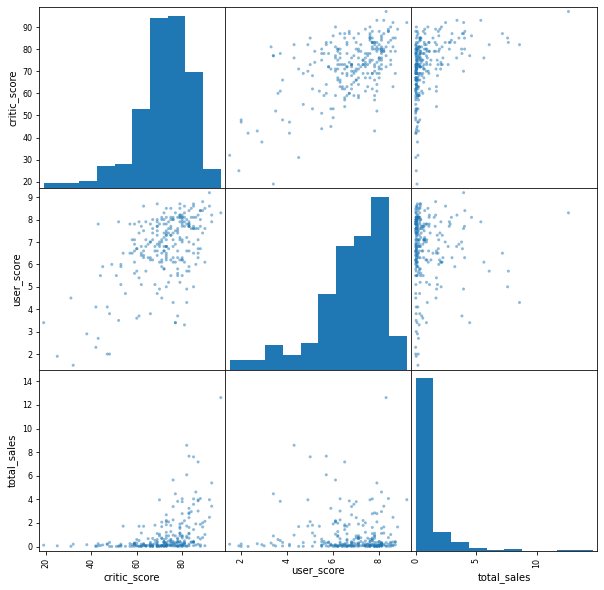

In [32]:
pd.plotting.scatter_matrix(PS4_score, figsize=(10, 10))
None

Для платформы PS4 cуществует слабая корреляция между продажами и оценками критиков, связь между продажами и оценками пользователей носит отрицательный характер. Соответственно значимой связи между оценками и продажами не существует.

In [33]:
for platform in top_8_2010: #просмотр корреляции для других платформ
    platform_corr = new_df.query('platform == @platform')
    corr_pl = platform_corr.loc[:,['critic_score', 'user_score', 'total_sales']]
    print(platform, '\n', corr_pl.corr(), '\n')

PS3 
               critic_score  user_score  total_sales
critic_score      1.000000    0.563315     0.380111
user_score        0.563315    1.000000     0.014089
total_sales       0.380111    0.014089     1.000000 

X360 
               critic_score  user_score  total_sales
critic_score      1.000000    0.568386     0.391253
user_score        0.568386    1.000000     0.038918
total_sales       0.391253    0.038918     1.000000 

PS4 
               critic_score  user_score  total_sales
critic_score      1.000000    0.557654     0.406568
user_score        0.557654    1.000000    -0.031957
total_sales       0.406568   -0.031957     1.000000 

3DS 
               critic_score  user_score  total_sales
critic_score      1.000000    0.745222     0.348740
user_score        0.745222    1.000000     0.222078
total_sales       0.348740    0.222078     1.000000 

XOne 
               critic_score  user_score  total_sales
critic_score      1.000000    0.472462     0.416998
user_score        0.4724

Выводы, полученные на основе анализа коэффициентов корреляции для плафтормы PS4 можно распространить на платформы PS3, XOne - для этих платформ отсутсвует значимая связь между оценками критиков и продажами. 
Влияние оценки критиков на продажи незначительно меняется от платформы к платформе.

Для более новых платформ - PS4 и XOne - оценки критиков немного важнее, т.к. у игроков еще может быть недостаточно опыта игр на платформе, кроме того, учитывая, что стоимость игр на новых платформах выше, то хочется доверится профессиональным критикам.

### Изучение общего распределения игр по жанрам. Характеристика самых прибыльных жанров, жанры с высокими и низкими продажами.

In [34]:
genre = pd.pivot_table(new_df, index = 'genre', values = 'total_sales', aggfunc = 'sum') #таблица продаж по жанрам
genre.sort_values('total_sales', ascending = False)

,total_sales
genre,
Action,557.80
Shooter,402.91
Role-Playing,245.63
Sports,237.15
Misc,139.42
Platform,88.68
Racing,88.31
Fighting,66.90
Simulation,50.26


In [35]:
genre_game = pd.pivot_table(new_df, index = 'genre', values = 'name', aggfunc = 'count') #таблтца количества игр по жанрам
genre_game.sort_values('name', ascending = False)

,name
genre,
Action,1269
Role-Playing,465
Adventure,410
Sports,389
Misc,375
Shooter,329
Racing,180
Fighting,159
Simulation,136


Самыми прибыльными жанрами явлются: Action, Shooter, Sports, Role-Playing, Misc. 
При этом 4 из них (кроме Shooter) также лидируют по количеству выпущенных игр, соответственно, более высокие продажи могут быть следствием большего количества выпущенных игр, а также их стоимости, которая увеличивается в зависимости от стоимости производства.

Наименее прибыльные жанры: Adventure, Strategy, Puzzle, при этом Adventure входит в топ-5 по количеству выпущенных игр.

<a id='3step'></a>

## Составление портрета пользователя каждого региона

### Определение для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Различия в долях продаж;
- Самые популярные жанры (топ-5). Пояснение разницы;
- Наличие влияния рейтинга ESRB на продажи в отдельном регионе.

Регион: Северная Америка

In [36]:
NA_stat = new_df.query('na_sales > 0')
NA_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2433 entries, 16 to 16425
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2433 non-null   object 
 1   platform         2433 non-null   object 
 2   year_of_release  2433 non-null   int16  
 3   genre            2433 non-null   object 
 4   na_sales         2433 non-null   float64
 5   eu_sales         2433 non-null   float64
 6   jp_sales         2433 non-null   float64
 7   other_sales      2433 non-null   float64
 8   critic_score     1547 non-null   float64
 9   user_score       1722 non-null   float64
 10  rating           2433 non-null   object 
 11  total_sales      2433 non-null   float64
dtypes: float64(7), int16(1), object(4)
memory usage: 232.8+ KB


In [37]:
NA_platform = pd.pivot_table(NA_stat, index = 'platform', values = 'na_sales', aggfunc = 'sum') #общие продажи в Северной Америке
NA_platform.sort_values('na_sales', ascending = False)

,na_sales
platform,
X360,226.80
PS3,168.26
PS4,108.74
XOne,93.12
3DS,82.65
Wii,48.56
WiiU,38.10
PC,29.88
DS,18.86


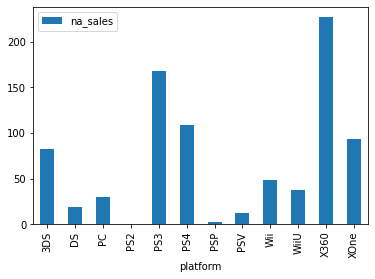

In [38]:
NA_platform.plot(kind='bar')
None

In [39]:
NA_total = NA_platform ['na_sales'].sum() #сумма продаж
NA_total

829.7600000000004

In [40]:
NA_platform['share'] = NA_platform['na_sales'] / NA_total * 100 #таблица с долей продаж
NA_platform.sort_values('na_sales', ascending = False)

,na_sales,share
platform,,
X360,226.80,27.333205
PS3,168.26,20.278153
PS4,108.74,13.104994
XOne,93.12,11.222522
3DS,82.65,9.960712
Wii,48.56,5.852295
WiiU,38.10,4.591689
PC,29.88,3.601041
DS,18.86,2.272946


In [41]:
NA_genre = pd.pivot_table(NA_stat, index = 'genre', values = 'na_sales', aggfunc = 'sum') #продажи по жанрам
NA_genre.sort_values('na_sales', ascending = False)

,na_sales
genre,
Action,230.92
Shooter,194.43
Sports,108.70
Role-Playing,83.78
Misc,69.69
Platform,38.28
Racing,31.98
Fighting,31.63
Simulation,15.37


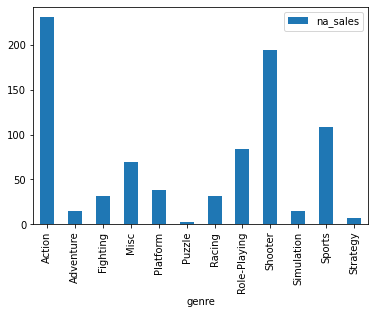

In [42]:
NA_genre.plot(kind='bar')
None

In [43]:
NA_rating = pd.pivot_table(NA_stat, index = 'rating', values = 'na_sales', aggfunc = 'sum')
NA_rating.sort_values('na_sales', ascending = False)

,na_sales
rating,
M,308.45
E,170.17
Нет рейтинга,123.69
E10+,117.72
T,109.31
EC,0.42


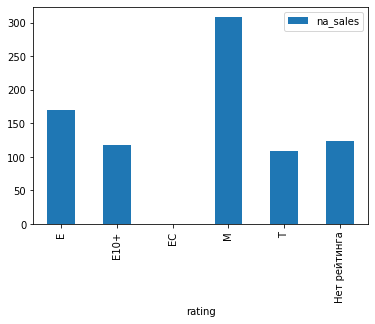

In [44]:
NA_rating.plot(kind='bar')
None

Портрет пользователей регинов.
***
*Северная Америка:*

1. Топ-5 платформ: X360, PS3, PS4, XOne, 3DS. Практически 1/3 продаж (27%) приходится на X360, 1/5 - на PS3. Остальные топ-плфтормы занимают гораздо меньшую долю рынка - около 1/10. 
2. Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Misc.
3. Влияние рейтинга ESRB на продажи: самые высокие продажи в категориях "M", "Е" и "E10+" - игры для лиц старше 17 лет, для всех возрастов и для всех, старше 10 лет, а также в категории "Нет рейтинга".
Средний пользователь в Северной Америке старше 17 лет, играет в игры на платформе X360, предпочитает экшен-игры.

Регион: Европа

In [45]:
EU_stat = new_df.query('eu_sales > 0')
EU_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2547 entries, 16 to 16431
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2547 non-null   object 
 1   platform         2547 non-null   object 
 2   year_of_release  2547 non-null   int16  
 3   genre            2547 non-null   object 
 4   na_sales         2547 non-null   float64
 5   eu_sales         2547 non-null   float64
 6   jp_sales         2547 non-null   float64
 7   other_sales      2547 non-null   float64
 8   critic_score     1622 non-null   float64
 9   user_score       1795 non-null   float64
 10  rating           2547 non-null   object 
 11  total_sales      2547 non-null   float64
dtypes: float64(7), int16(1), object(4)
memory usage: 243.8+ KB


In [46]:
EU_platform = pd.pivot_table(EU_stat, index = 'platform', values = 'eu_sales', aggfunc = 'sum') #общие продажи в Европе
EU_platform.sort_values('eu_sales', ascending = False)

,eu_sales
platform,
PS3,163.10
PS4,141.09
X360,117.10
3DS,61.27
PC,56.70
XOne,51.59
Wii,29.60
WiiU,25.13
PSV,13.07


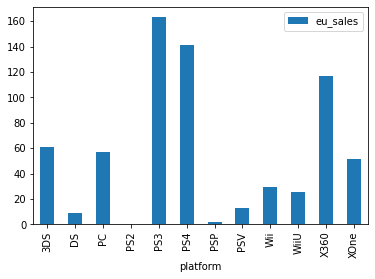

In [47]:
EU_platform.plot(kind='bar')
None

In [48]:
EU_total = EU_platform ['eu_sales'].sum() #сумма продаж
EU_total

669.7900000000006

In [49]:
EU_platform['share'] = EU_platform['eu_sales'] / EU_total * 100 #добавление доли продаж
EU_platform.sort_values('eu_sales', ascending = False)

,eu_sales,share
platform,,
PS3,163.10,24.350916
PS4,141.09,21.064811
X360,117.10,17.483092
3DS,61.27,9.147643
PC,56.70,8.465340
XOne,51.59,7.702414
Wii,29.60,4.419296
WiiU,25.13,3.751922
PSV,13.07,1.951358


In [50]:
EU_genre = pd.pivot_table(EU_stat, index = 'genre', values = 'eu_sales', aggfunc = 'sum')
EU_genre.sort_values('eu_sales', ascending = False)

,eu_sales
genre,
Action,199.12
Shooter,148.02
Sports,88.48
Role-Playing,62.30
Racing,40.58
Misc,39.72
Platform,30.07
Simulation,19.72
Fighting,16.24


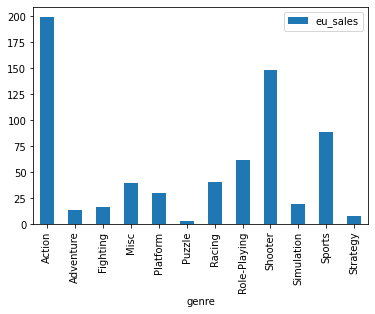

In [51]:
EU_genre.plot(kind='bar')
None

In [52]:
EU_rating = pd.pivot_table(EU_stat, index = 'rating', values = 'eu_sales', aggfunc = 'sum') #продажи по рейтингу
EU_rating.sort_values('eu_sales', ascending = False)

,eu_sales
rating,
M,250.26
E,141.73
Нет рейтинга,116.61
T,83.16
E10+,78.00
RP,0.03


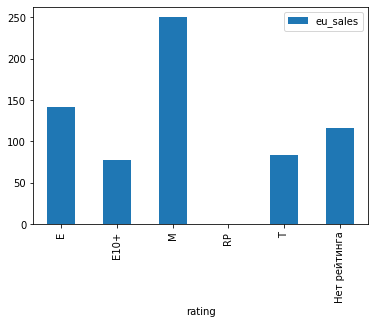

In [53]:
EU_rating.plot(kind='bar')
None

Портрет пользователей регионов
***
*Европа:*
1. Топ-5 платформ: PS3, PS4, X360,  3DS, PC. 1/4 продаж приходтся на PS3, 1/5 - на PS4, чуть меньше 1/5 на X360. Остальные платформы по показателям продаж существенно ниже.
2. Самые популярные жанры: Action, Shooter, Sports, Role-Playing, Racing. Предпочтения пользователей Европы очень похожи с  предпочтениям в Северной Америке, кроме анра Racing.
3. Влияние рейтинга ESRB на продажи: самые высокие продажи в категориях "M", "Е" и "Т" - игры для лиц старше 17 лет, для всех возрастов и для подростков 13-19 лет, а также в категории "Нет рейтинга"
Средний пользователь в Европе старше 17 лет, играет в игры на платформе PS3, предпочитает экшен-игры.

Регион: Япония

In [54]:
JP_stat = new_df.query('jp_sales > 0')
JP_stat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2006 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2006 non-null   object 
 1   platform         2006 non-null   object 
 2   year_of_release  2006 non-null   int16  
 3   genre            2006 non-null   object 
 4   na_sales         2006 non-null   float64
 5   eu_sales         2006 non-null   float64
 6   jp_sales         2006 non-null   float64
 7   other_sales      2006 non-null   float64
 8   critic_score     731 non-null    float64
 9   user_score       788 non-null    float64
 10  rating           2006 non-null   object 
 11  total_sales      2006 non-null   float64
dtypes: float64(7), int16(1), object(4)
memory usage: 192.0+ KB


In [55]:
JP_platform = pd.pivot_table(JP_stat, index = 'platform', values = 'jp_sales', aggfunc = 'sum') #общие продажи в Японии
JP_platform.sort_values('jp_sales', ascending = False)

,jp_sales
platform,
3DS,100.62
PS3,49.39
PSP,24.04
PSV,21.84
PS4,15.96
WiiU,13.01
Wii,8.97
DS,8.04
X360,3.35


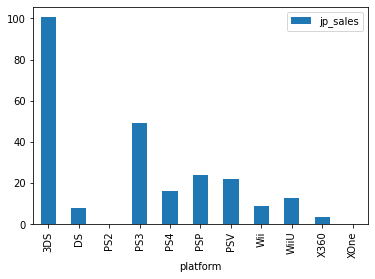

In [56]:
JP_platform.plot(kind='bar')
None

In [57]:
JP_total = JP_platform ['jp_sales'].sum() #сумма продаж
JP_total

245.6500000000002

In [58]:
JP_platform['share'] = JP_platform['jp_sales'] / JP_total * 100 #доля продаж
JP_platform.sort_values('jp_sales', ascending = False)

,jp_sales,share
platform,,
3DS,100.62,40.960716
PS3,49.39,20.105842
PSP,24.04,9.786281
PSV,21.84,8.890698
PS4,15.96,6.497049
WiiU,13.01,5.296153
Wii,8.97,3.651537
DS,8.04,3.272949
X360,3.35,1.363729


In [59]:
JP_genre = pd.pivot_table(JP_stat, index = 'genre', values = 'jp_sales', aggfunc = 'sum') #продажи по жанрам
JP_genre.sort_values('jp_sales', ascending = False)

,jp_sales
genre,
Role-Playing,79.87
Action,63.62
Misc,17.60
Fighting,12.38
Platform,12.13
Adventure,12.07
Shooter,11.92
Simulation,11.64
Sports,11.09


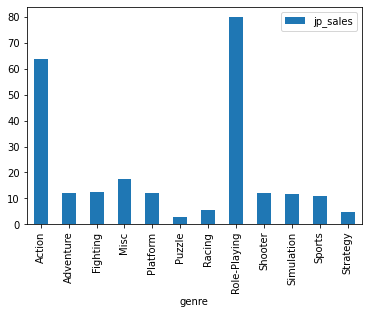

In [60]:
JP_genre.plot(kind='bar')
None

In [61]:
JP_rating = pd.pivot_table(JP_stat, index = 'rating', values = 'jp_sales', aggfunc = 'sum')  #продажи по рейтингу
JP_rating.sort_values('jp_sales', ascending = False)

,jp_sales
rating,
Нет рейтинга,138.21
E,36.68
T,33.39
M,26.14
E10+,11.23


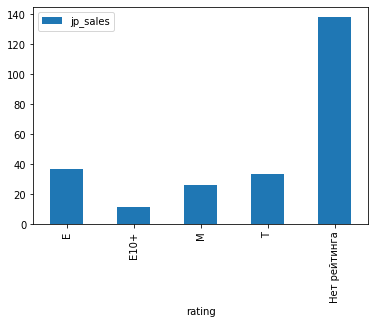

In [62]:
JP_rating.plot(kind='bar')
None

Портрет пользователей регионов
***
*Япония:*
1. Топ-5 платформ: 3DS, PS3, PSP, PSV, PS4. Доля продаж игр на платформе 3DS - 40%, на платформе PS3 - 20%. Остальные платформы по показателям продаж существенно ниже.
2. Самые популярные жанры: Role-Playing, Action, Misc, Fighting.
3. Влияние рейтинга ESRB на продажи: самые высокие продажи в категории "Нет рейтинга", в категориях с рейтингом самые высокие продажи с игр с рейтингов  "Е" и "Т" - игры для всех возрастов и для подростков 13-19 лет.
Средний пользователь в Японии - это подросток 13-19 лет, он играет в игры на платформе 3DS, предпочитает ролевые игры.

Распределение продаж по платформам в регионах.

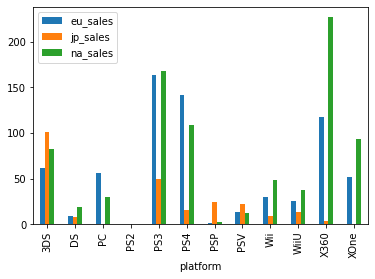

In [63]:
region_stat_platform = new_df.loc[:,['platform', 'na_sales', 'eu_sales', 'jp_sales']] 
region_stat_platform_pivot = pd.pivot_table(region_stat_platform, index = 'platform', aggfunc = 'sum')
region_stat_platform_pivot.plot(kind = 'bar')
None

Распределение продаж по жанрам в регионах.

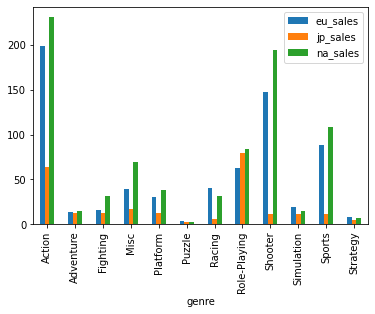

In [64]:
region_stat_genre = new_df.loc[:,['genre', 'na_sales', 'eu_sales', 'jp_sales']]
region_stat_genre_pivot = pd.pivot_table(region_stat_genre, index = 'genre', aggfunc = 'sum')
region_stat_genre_pivot.plot(kind = 'bar')
None

Распределение продаж по рейтингу в регионах.

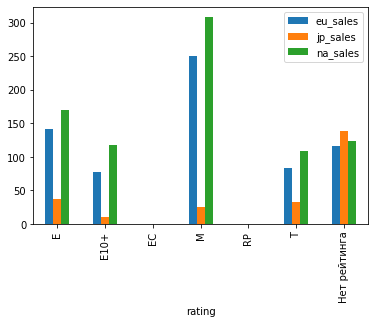

In [65]:
region_stat_rating = new_df.loc[:,['rating', 'na_sales', 'eu_sales', 'jp_sales']]
region_stat_rating_pivot = pd.pivot_table(region_stat_rating, index = 'rating', aggfunc = 'sum')
region_stat_rating_pivot.plot(kind = 'bar')
None



Сравнение пользователей.
***
У пользователей различных регионов различные предпочтения. Пользователи Северной Америки и особенно Японии выбирают игры на платформах собственного производства (разработки Microsoft для Северной Америки и разработки Sony и Nintendo для Японии). При этом среди топ-5 платформ в Японии нет платформ, которые были бы разработаны не японскими компаниями.
Пользователи Европы более вариативны в своем выборе. Также это единственный регион, где в топ-5 платформ входит персональные компьютеры.


Во всех регионах среди популярных жанров Action (экшен), Misc (аркада), Role-Playing (ролевая игра), отличается только степень предпочтения пользователей. Так, в Японии самый популярный жанр - ролевая игра, тогда как в  Европе и Северной Америке - экшен. Кроме того, в этих регионах на втором месте по популярности шутеры, тогда как в Японии этот жанр лишь на 7 месте. При этом жанр Fighting в Японии входит в топ-5, в отличие от Северной Америки и Европы, где этот жанр гораздо менее популярен.
Жанровые предпочтения пользователей Северной Америки и Европы практически одинаковые. 


Выбор жанров по регионам соотносится с возрастной категорией, на которую ориентированы игры. В Северной Америке и Европе большинство продаваемых игр для лиц старше 17 лет, что объясняет более агрессивный характер выбираемых жанров. В Японии же более продваемые игры без рейтинга, а также для подростков и для всех возрастов, что объясняет первое место более фантастических ролевых игр, а также присутствие среди топ жанров универсальных платформенных игр.
Кроме того Япония - единственная страна, в которой преобладают продажи игр без рейтинга. Это может быть связано как с особенностями культуры компьютерных игр в Японии (играют пользователи самого разного возраста и предпочитают определенную стилистику и сюжет), а также большому распространению игр, произведенных в самой стране и наличию собственного рейтингового агентства, т.е. многие популярные игры могут не обращаться за рейтинговой оценкой в ESRB.

<a id='4step'></a>

## Исследование статистических показателей

### Изменение пользовательского рейтинга и рейтинга критиков в различных жанрах. Подсчет среднего количества, дисперсии и стандартного отклонения. Построение гистограмм. Описание распределений.

Гистограмы распределения рейтинга критиков по жанрам.

In [66]:
genres_new = new_df['genre'].unique().tolist()
genres_new

['Action',
 'Shooter',
 'Role-Playing',
 'Racing',
 'Platform',
 'Misc',
 'Simulation',
 'Sports',
 'Fighting',
 'Adventure',
 'Puzzle',
 'Strategy']

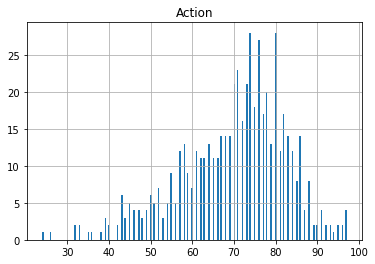

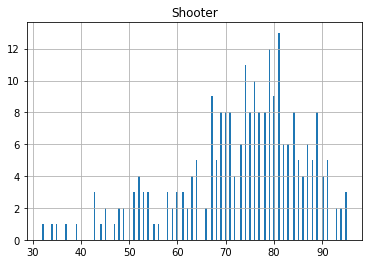

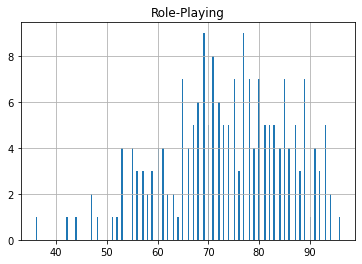

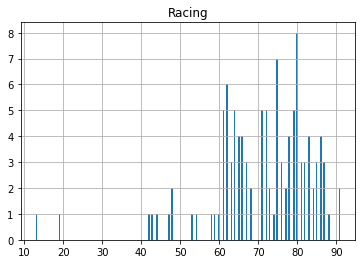

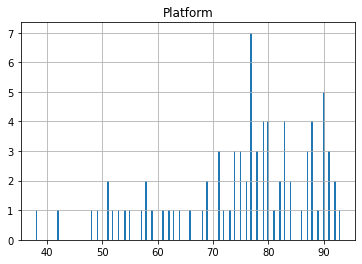

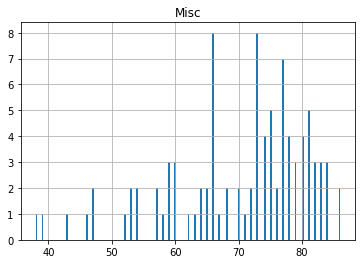

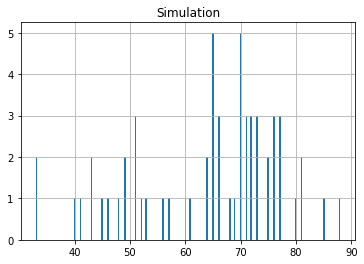

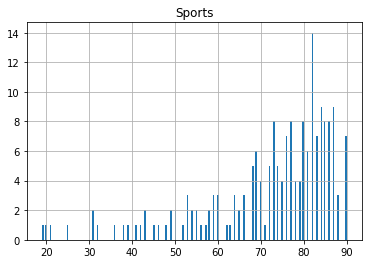

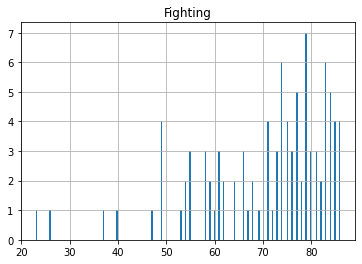

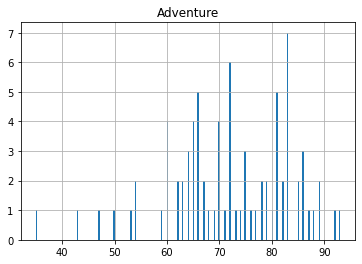

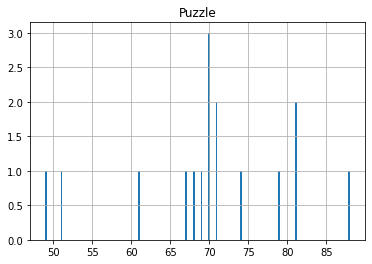

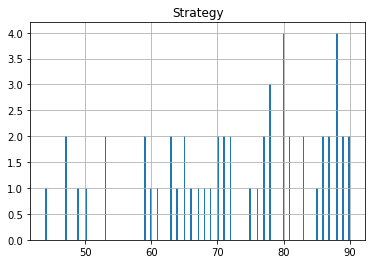

In [67]:
rating_stat_critic = new_df.loc[:,['genre','critic_score']]
for genre in genres_new: #гистограммы оценок критиков по жанрам
    genre_critic = rating_stat_critic.query('genre == @genre')
    genre_critic.hist(bins = 200)
    plt.title(genre)
    
    

Статистические показатели оценки критиков по каждому жанру.

In [68]:
for genre in genres_new:
    genre_critic_score = rating_stat_critic.query('genre == @genre')
    variance_estimate_critic = np.var(genre_critic_score, ddof=1)
    print(genre,'\n',"Средняя оценка:", genre_critic_score['critic_score'].mean(), '\n', 
          "Стандартное отклонение:", genre_critic_score['critic_score'].std(), '\n',
          "Дисперсия:", variance_estimate_critic, '\n')

Action 
 Средняя оценка: 69.89810017271157 
 Стандартное отклонение: 12.779944002332357 
 Дисперсия: critic_score    163.326969
dtype: float64 

Shooter 
 Средняя оценка: 73.06451612903226 
 Стандартное отклонение: 13.065541375114925 
 Дисперсия: critic_score    170.708371
dtype: float64 

Role-Playing 
 Средняя оценка: 73.5909090909091 
 Стандартное отклонение: 11.992777783579285 
 Дисперсия: critic_score    143.826719
dtype: float64 

Racing 
 Средняя оценка: 70.91964285714286 
 Стандартное отклонение: 13.15269875561607 
 Дисперсия: critic_score    172.993485
dtype: float64 

Platform 
 Средняя оценка: 74.95121951219512 
 Стандартное отклонение: 13.107252199558244 
 Дисперсия: critic_score    171.80006
dtype: float64 

Misc 
 Средняя оценка: 70.13684210526316 
 Стандартное отклонение: 11.067116834478416 
 Дисперсия: critic_score    122.481075
dtype: float64 

Simulation 
 Средняя оценка: 63.932203389830505 
 Стандартное отклонение: 13.171107887812706 
 Дисперсия: critic_score    173.

Гистограмы распределения рейтинга пользователей по жанрам.

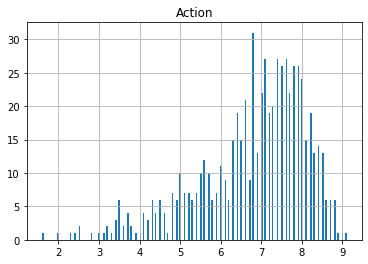

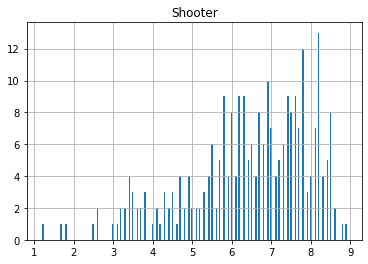

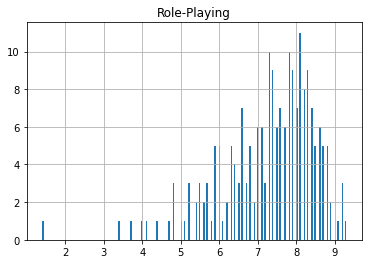

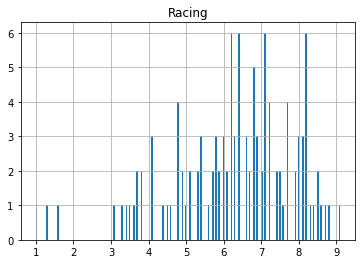

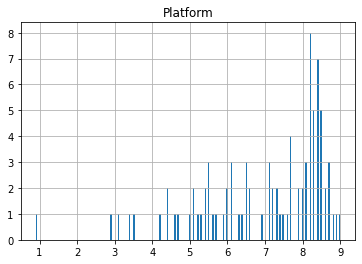

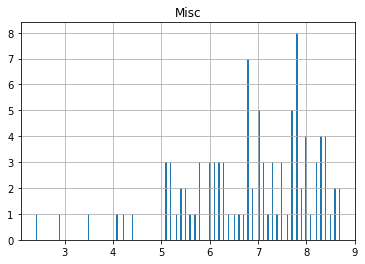

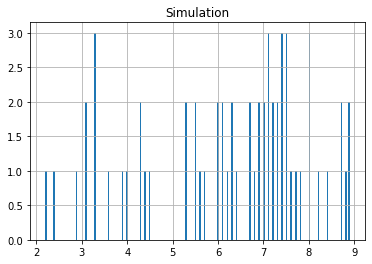

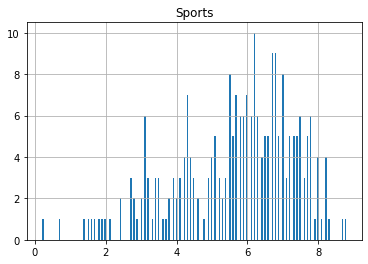

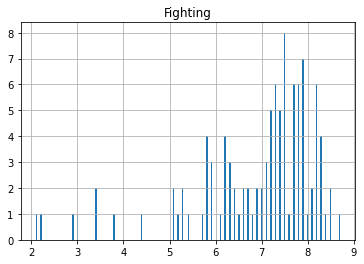

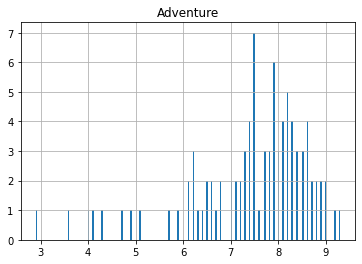

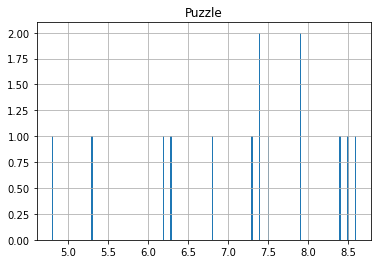

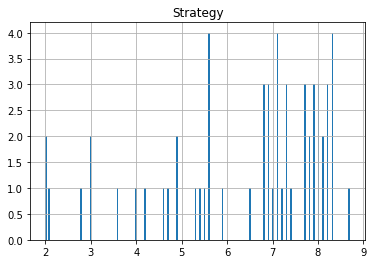

In [69]:
rating_stat_user = new_df.loc[:,['genre','user_score']]
for genre in genres_new:
    genre_user = rating_stat_user.query('genre == @genre')
    genre_user.hist(bins = 200)
    plt.title(genre)

Статистические показатели оценки пользователей по каждому жанру.

In [70]:
for genre in genres_new:
    genre_user_score = rating_stat_user.query('genre == @genre')
    variance_estimate_user = np.var(genre_user_score, ddof=1)
    print(genre,'\n',"Средняя оценка:", genre_user_score['user_score'].mean(), '\n', 
          "Стандартное отклонение:", genre_user_score['user_score'].std(), '\n',
          "Дисперсия:", variance_estimate_user, '\n')

Action 
 Средняя оценка: 6.775903614457831 
 Стандартное отклонение: 1.3460598093337675 
 Дисперсия: user_score    1.811877
dtype: float64 

Shooter 
 Средняя оценка: 6.415073529411765 
 Стандартное отклонение: 1.557991182882236 
 Дисперсия: user_score    2.427337
dtype: float64 

Role-Playing 
 Средняя оценка: 7.260952380952382 
 Стандартное отклонение: 1.2306683319140548 
 Дисперсия: user_score    1.514545
dtype: float64 

Racing 
 Средняя оценка: 6.26896551724138 
 Стандартное отклонение: 1.6339024393791985 
 Дисперсия: user_score    2.669637
dtype: float64 

Platform 
 Средняя оценка: 6.966666666666668 
 Стандартное отклонение: 1.6660523212308345 
 Дисперсия: user_score    2.77573
dtype: float64 

Misc 
 Средняя оценка: 6.837999999999999 
 Стандартное отклонение: 1.309235261401468 
 Дисперсия: user_score    1.714097
dtype: float64 

Simulation 
 Средняя оценка: 6.219354838709678 
 Стандартное отклонение: 1.8011689018548456 
 Дисперсия: user_score    3.244209
dtype: float64 

Sports

Распределение жанров по средним оценкам критиков.

In [71]:
genre_critic_top = pd.pivot_table(rating_stat_critic, index = 'genre', values = 'critic_score', aggfunc = 'mean')
genre_critic_top.sort_values('critic_score', ascending = False)

,critic_score
genre,
Platform,74.951220
Role-Playing,73.590909
Shooter,73.064516
Strategy,72.703704
Sports,72.005291
Adventure,71.950000
Racing,70.919643
Fighting,70.520000
Misc,70.136842


Распределение жанров по средним оценкам пользователей.

In [72]:
genre_user_top = pd.pivot_table(rating_stat_user, index = 'genre', values = 'user_score', aggfunc = 'mean')
genre_user_top.sort_values('user_score', ascending = False)

,user_score
genre,
Adventure,7.401075
Role-Playing,7.260952
Puzzle,7.164286
Platform,6.966667
Fighting,6.869811
Misc,6.838000
Action,6.775904
Strategy,6.422034
Shooter,6.415074


- Оценки критиков.


Оценка критиков по жанрам отличается высокой вариативностью. Так, самый большой разброс оценок критиков (по показателям стандратного отклонения и дисперсии) в жанрах Sports, Firthing, Racing, Shooter, Action, то есть в этих жанрах есть как откровенно слабые, так и топ-игры. 

Самый маленький разброс оценок для игр в жанре Puzzle, соответственно, уровень этих игр примерно одинаков.Однако большой разброс данных также отчасти связан с использованием стобалльной шкалы.
Наибольшая скошенность данных в сторону более высоких оценок у игр в жанрах Sports, Fighting - критики предпочита.т динамичные жанры.

В среднем самые высоко оцененные критиками жанры: Platform, Role-Playing, Strategy. Наименее популярны у критиков Misс, Action, Simulation. 

- Оценка пользователей.

Оценка пользоватей отличается меньшей вариативностью, в т.ч. из-за использования 10-балльной шкалы. Самый большой разброс оценок в жанрах Strategy, Simulation, Sports, в этих жанрах есть игры разной для пользователей привлекательности. Самый маленький разброс оценок для игр в жанре Puzzle, как и для оценок критиков.


Среди фаворитов пользователей - Adventure, Platform, Role-Playing, что частично совпадает с оценками критиков. Самые низко оцененные пользователями жанры: Racing, Simulation, Sports. Наибольшая скошенность в сторону положительных оценок наблюдается для жанров Fighting, Action, Platform - пользователям кроме динамики нравится еще и достигать своей цели:)



<a id='5step'></a>

## Проверка гипотез
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

При проверке гипотез о равенстве среднего двух генеральных совокупностей по взятым из них выборкам будет использоваться t-тест.

Гипотеза 1.

Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны.

Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [73]:
platform_stat_user = new_df.loc[:,['platform','user_score']] #подготовка данных для проверки гипотез
Xbox_stat_user = platform_stat_user.query('platform == "XOne"')
Xbox_stat_user

,platform,user_score
99,XOne,NaN
165,XOne,7.9
179,XOne,5.4
241,XOne,6.4
269,XOne,6.2
...,...,...
16359,XOne,8.2
16372,XOne,6.6
16374,XOne,NaN
16389,XOne,6.7


In [74]:
PC_stat_user = platform_stat_user.query('platform == "PC"')
PC_stat_user.head()

,platform,user_score
191,PC,4.0
312,PC,8.1
455,PC,3.9
476,PC,5.9
534,PC,7.5


In [75]:
Xbox_user = Xbox_stat_user['user_score'].dropna()
Xbox_user

165      7.9
179      5.4
241      6.4
269      6.2
372      4.1
        ... 
16273    6.8
16326    6.0
16359    8.2
16372    6.6
16389    6.7
Name: user_score, Length: 182, dtype: float64

In [76]:
PC_user = PC_stat_user['user_score'].dropna()
PC_user

191      4.0
312      8.1
455      3.9
476      5.9
534      7.5
        ... 
16248    1.4
16313    7.9
16421    7.6
16425    5.8
16431    7.2
Name: user_score, Length: 307, dtype: float64

In [77]:
alpha = .01 #проверка гипотезы
platform_results = st.ttest_ind(Xbox_user, PC_user)
print('p-значение:', platform_results.pvalue)
if platform_results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу


In [78]:
PC_stat_user['user_score'].mean() #средний пользовательский рейтинг платфомы PC

6.451791530944625

In [79]:
Xbox_stat_user['user_score'].mean() #средний пользовательский рейтинг платфомы Xbox

6.521428571428572

Нулевая гипотеза не отвергнута. Таким образом, можно говорить о том, что средние пользовательские рейтинги платформ Xbox One и РС скорее одинаковые.

Простое сравнение средних подтверждает верность статистической провеки гипотез.

Гипотеза 2. 

Нулевая гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

In [80]:
genre_stat_user = new_df.loc[:,['platform','user_score']] #подготовка данных для проверки гипотезы
Action_stat_user = rating_stat_user.query('genre == "Action"')
Action_stat_user

,genre,user_score
16,Action,8.2
23,Action,8.1
42,Action,8.3
81,Action,6.6
118,Action,8.3
...,...,...
16409,Action,NaN
16420,Action,NaN
16421,Action,7.6
16428,Action,NaN


In [81]:
Action_user = Action_stat_user['user_score'].dropna()
Action_user

16       8.2
23       8.1
42       8.3
81       6.6
118      8.3
        ... 
16326    6.0
16381    8.5
16383    5.1
16389    6.7
16421    7.6
Name: user_score, Length: 664, dtype: float64

In [82]:
Sports_stat_user = rating_stat_user.query('genre == "Sports"')
Sports_stat_user

,genre,user_score
77,Sports,4.3
94,Sports,5.0
122,Sports,NaN
126,Sports,4.3
143,Sports,5.7
...,...,...
16248,Sports,1.4
16291,Sports,NaN
16367,Sports,NaN
16372,Sports,6.6


In [83]:
Sports_user = Sports_stat_user['user_score'].dropna()
Sports_user

77       4.3
94       5.0
126      4.3
143      5.7
263      4.5
        ... 
15887    6.9
15969    5.5
16181    4.5
16248    1.4
16372    6.6
Name: user_score, Length: 246, dtype: float64

In [84]:
alpha = .01 #проверка гипотезы
genre_results = st.ttest_ind(Action_user, Sports_user)
print('p-значение:', genre_results.pvalue)
if platform_results.pvalue > alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 5.1974550252152054e-24
Отвергаем нулевую гипотезу


In [85]:
Sports_stat_user['user_score'].mean() #средний пользовательский рейтинг игра жанра Sports

5.650813008130081

In [86]:
Action_stat_user['user_score'].mean() #средний пользовательский рейтинг игра жанра Action

6.775903614457831

Нулевая гипотеза была отвергнута, соответственно, средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта»), вероятно, разные.

Простое сравнение средних подтверждает результаты статистической проверки гипотезы.

Гипотезы были проверены на основании проведения теста Стьюдента, который позволяет сравнить среднее значение двух выборок. За пороговое значение было принято 0.01, что говорит о достоверности резкльтата в 99%.

<a id='6step'></a>

## Общий вывод

В рамках проекты были выполнены следующие задачи:
- подготовка данных;
- проведение исследовательского анализа данных в отношении продаж по платформам, распределения игр по жанрам;
- составление портрета пользователя по регионам;
- исследование статистичсеких показателей в отношении оценко критиков и пользоваталей по жанрам;
- проверка гипотез о пользовательских рейтингах.

Были выявлены следующие определяющие успешность игры закономерности:
- Платформа игры. Если игра выпущена на платформе, которая находится на пике популярности, то ее продажи могут быть выше. Для 2017 года это платформы PS4, XOne. 
- Жанр. Предпочения пользователей по жанрам зависят от региона. Для Северной Америки и Европы экшены и шутеры, для Японии - ролевые игры и экшены. 
- Оценки критиков. Самые высоко оцененные критиками игры, как правило, платформенные и ролевые. При этом для интересующих нас платформ уровень продаж не связан с оценками критиков, но платформенные игры входят в топ жанров только в Японии.
- Рейтинг. Также зависит от региона. В Северной Америке и Европе наиболее популярними будут игры для лиц, страше 17 лет, а в Японии популярны игры без рейтинга и игры для всех возрастов. 

Таким образом, средней успешной игрой для всех реионов будет игра для платформы PS4 в жанре экшен для лиц старше 17 лет, с высокими оценками критиков.

